In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import pickle
from collections import Counter

In [5]:
trip_bay = pd.read_csv('bay_trip_city.csv', index_col=0)


In [6]:
trip_bay.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,city
0,4576,63,2013-08-29 14:13:00,South Van Ness at Market,66,2013-08-29 14:14:00,South Van Ness at Market,66,520,Subscriber,94127,San Francisco
1,4607,70,2013-08-29 14:42:00,San Jose City Hall,10,2013-08-29 14:43:00,San Jose City Hall,10,661,Subscriber,95138,San Jose
2,4130,71,2013-08-29 10:16:00,Mountain View City Hall,27,2013-08-29 10:17:00,Mountain View City Hall,27,48,Subscriber,97214,Mountain View
3,4251,77,2013-08-29 11:29:00,San Jose City Hall,10,2013-08-29 11:30:00,San Jose City Hall,10,26,Subscriber,95060,San Jose
4,4299,83,2013-08-29 12:02:00,South Van Ness at Market,66,2013-08-29 12:04:00,Market at 10th,67,319,Subscriber,94103,San Francisco


In [4]:
trip_bay.shape

(669959, 13)

In [25]:
np.max(trip_bay.bike_id.unique())

878

### check interval 

In [78]:
def collectinterval(dataset):
    #final_id_list = []
    interval_list = []
    bikeid = set(dataset.bike_id.unique())
    for bike_id in bikeid:
        temp = dataset[dataset['bike_id'] == bike_id] 
        temp.loc[:,'start_date'] =pd.to_datetime(temp['start_date'].values)
        temp.loc[:,'end_date'] =pd.to_datetime(temp['end_date'].values)
        temp = temp.sort_values(by=['start_date'])
        for i in range(1, len(temp)):
            t = ((temp.iloc[i].start_date-temp.iloc[i-1].end_date)/np.timedelta64(1, 'D')).astype(int)
            interval_list.append(t)
        #print(bike_id)
    return interval_list

In [82]:
temp = trip[(trip['bike_id'] == 9) | (trip['bike_id'] == 10) ]

In [85]:
t = collectinterval(trip_bay)
 

C:\Users\Xuancheng Fan\AppData\Local\Programs\Python\Python35\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
167
168
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293

In [86]:
len(t)

669259

In [95]:
np.mean(t), np.median(t), np.std(t)

(0.43380066610983192, 0.0, 3.0383686951896447)

In [96]:
np.mean(t_se), np.median(t_se), np.std(t_se)

(0.78627900155047425, 0.0, 3.7745753185825879)

In [97]:
t_all = t + t_se

In [98]:
np.mean(t_all), np.median(t_all), np.std(t_all)

(0.53942506616102792, 0.0, 3.2803633470504514)

### Duration

In [33]:
interval_log = np.log10(np.array(trip_bay.duration))

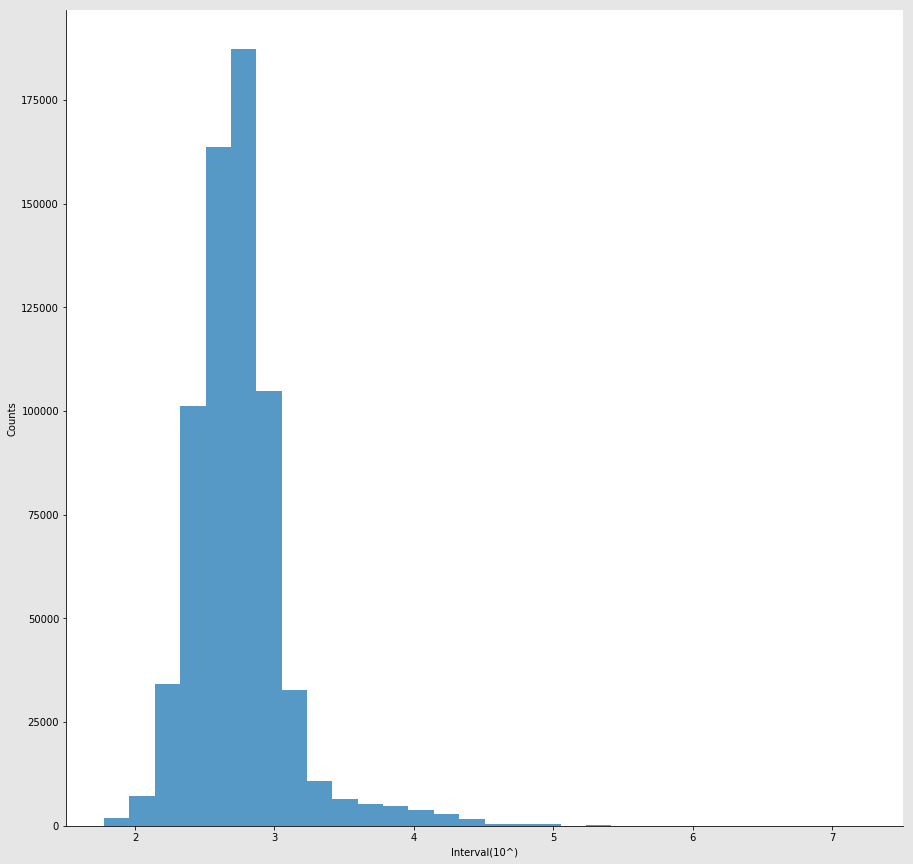

In [34]:
fig, ax = plt.subplots(figsize = [15,15], facecolor = [0.9,0.9,0.9])
#labels, values = zip(*counter_inteval.items())
#plt.hist(c,facecolor='g')
#indexes = np.arange(len(labels))
#plt.bar(indexes, values, 1)
plt.hist(interval_log, bins=30, alpha=0.75)
plt.xlabel('Interval(10^)')
plt.ylabel('Counts')
#plt.title('Bay')
#plt.axis([0, 10000, 0, 1000000])
#plt.grid(True)
#ax.set_xlim([0, 20])
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.show()

In [17]:
np.mean(interval_log), np.std(interval_log)

(2.7404123071376234, 0.34480826453833985)

In [37]:
t1 = np.mean(interval_log) + 2.5*np.std(interval_log)

In [38]:
np.power(10, t1)

4003.4367220904596

In [43]:
t2 = np.mean(interval_log) - 7*np.std(interval_log)

In [44]:
np.power(10, t2)

2.122044345617919

In [23]:
c_bay = trip_bay.duration.tolist()

In [160]:
t = sorted(c_bay)

In [166]:
index_t = int(len(t) * 0.005)

In [167]:
t[-index_t]

20638

In [175]:
trip_bay_trim = trip_bay[(trip_bay.duration >= 120) & (trip_bay.duration <= 6*3600) ]
#trip_bay_trim = trip_bay[trip_bay.duration >= 120 ]

In [176]:
trip_bay_trim.shape

(661556, 13)

In [178]:
trip_bay_trim.to_csv('trim_bay_2min_6hours.csv')

In [170]:
trip_bay.shape

(669959, 13)

In [6]:
c_bay[:10]

[63, 70, 71, 77, 83, 103, 109, 111, 113, 114]

In [7]:
trip_bay.head(10)

,Unnamed: 0,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,city
0,0,4576,63,2013-08-29 14:13:00,South Van Ness at Market,66,2013-08-29 14:14:00,South Van Ness at Market,66,520,Subscriber,94127,San Francisco
1,1,4607,70,2013-08-29 14:42:00,San Jose City Hall,10,2013-08-29 14:43:00,San Jose City Hall,10,661,Subscriber,95138,San Jose
2,2,4130,71,2013-08-29 10:16:00,Mountain View City Hall,27,2013-08-29 10:17:00,Mountain View City Hall,27,48,Subscriber,97214,Mountain View
3,3,4251,77,2013-08-29 11:29:00,San Jose City Hall,10,2013-08-29 11:30:00,San Jose City Hall,10,26,Subscriber,95060,San Jose
4,4,4299,83,2013-08-29 12:02:00,South Van Ness at Market,66,2013-08-29 12:04:00,Market at 10th,67,319,Subscriber,94103,San Francisco
5,5,4927,103,2013-08-29 18:54:00,Golden Gate at Polk,59,2013-08-29 18:56:00,Golden Gate at Polk,59,527,Subscriber,94109,San Francisco
6,6,4500,109,2013-08-29 13:25:00,Santa Clara at Almaden,4,2013-08-29 13:27:00,Adobe on Almaden,5,679,Subscriber,95112,San Jose
7,7,4563,111,2013-08-29 14:02:00,San Salvador at 1st,8,2013-08-29 14:04:00,San Salvador at 1st,8,687,Subscriber,95112,San Jose
8,8,4760,113,2013-08-29 17:01:00,South Van Ness at Market,66,2013-08-29 17:03:00,South Van Ness at Market,66,553,Subscriber,94103,San Francisco
9,9,4258,114,2013-08-29 11:33:00,San Jose City Hall,10,2013-08-29 11:35:00,MLK Library,11,107,Subscriber,95060,San Jose


In [9]:
counter_bay = Counter(c_bay)


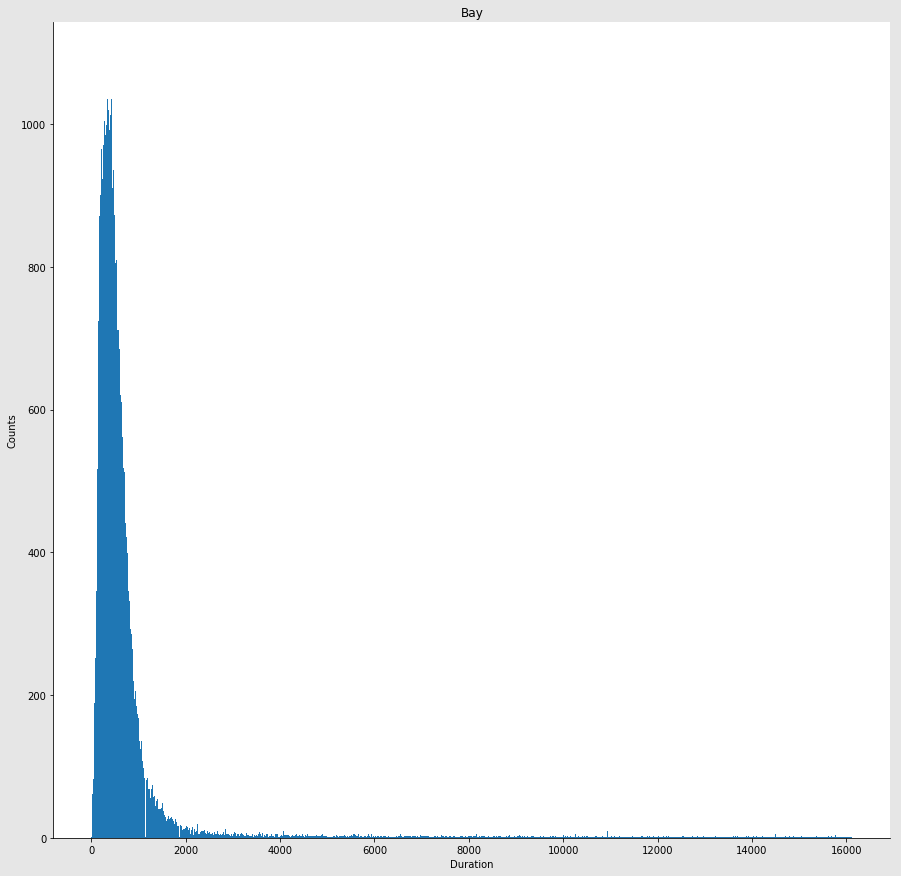

In [10]:
# prepare IPython to work with matplotlib and import the library to something convenient
# %matplotlib inline  
import matplotlib.pyplot as plt  

# edit the code below to make the graph look good

fig, ax = plt.subplots(figsize = [15,15], facecolor = [0.9,0.9,0.9])
labels, values = zip(*counter_bay.items())
#plt.hist(c,facecolor='g')
indexes = np.arange(len(labels))
plt.bar(indexes, values, 1)
plt.xlabel('Duration')
plt.ylabel('Counts')
plt.title('Bay')
#plt.axis([0, 10000, 0, 1000000])
#plt.grid(True)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.show()

In [12]:
np.mean(c_bay), np.median(c_bay)

(1107.9498461846172, 517.0)

In [13]:
c_bay = list(filter(lambda x: x < 3000, c_bay))

In [14]:
counter_bay = Counter(c_bay)

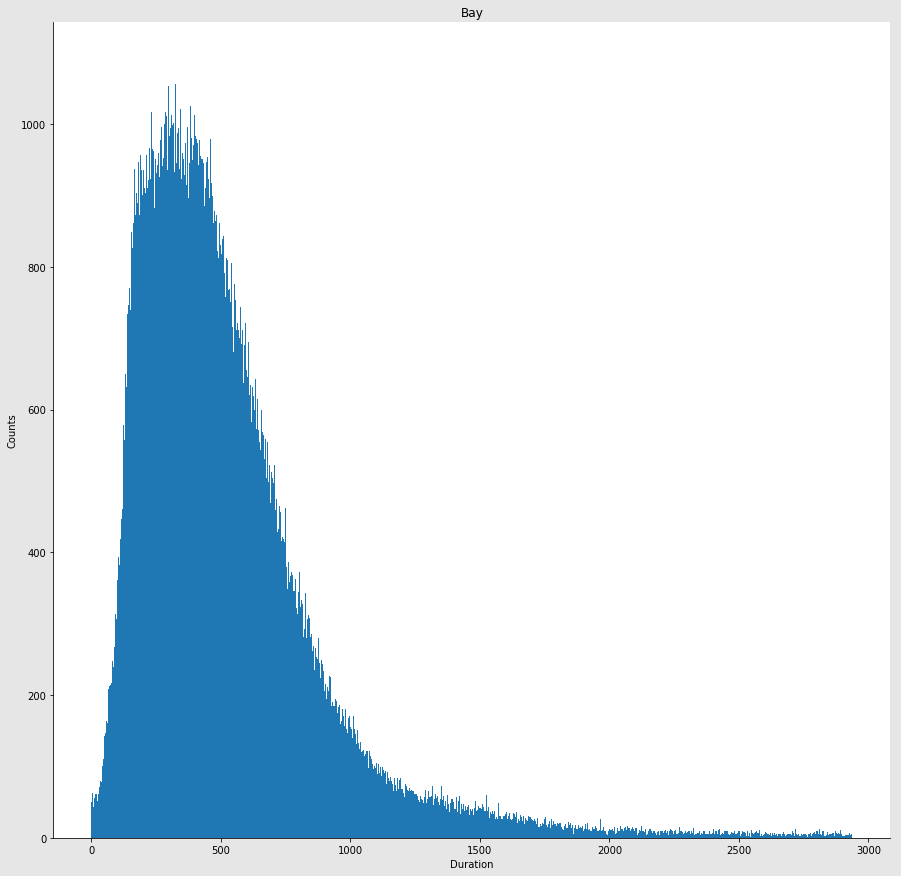

In [15]:

fig, ax = plt.subplots(figsize = [15,15], facecolor = [0.9,0.9,0.9])
labels, values = zip(*counter_bay.items())
#plt.hist(c,facecolor='g')
indexes = np.arange(len(labels))
plt.bar(indexes, values, 1)
plt.xlabel('Duration')
plt.ylabel('Counts')
plt.title('Bay')
#plt.axis([0, 10000, 0, 1000000])
#plt.grid(True)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.show()

In [16]:
np.mean(c_bay), np.std(c_bay)

(586.46968017414088, 375.09440463421691)

In [17]:
#trip_se['duration'] = trip_se.tripduration.astype(int)
c_se = trip_se.duration.tolist()

In [18]:
counter_se = Counter(c_se)

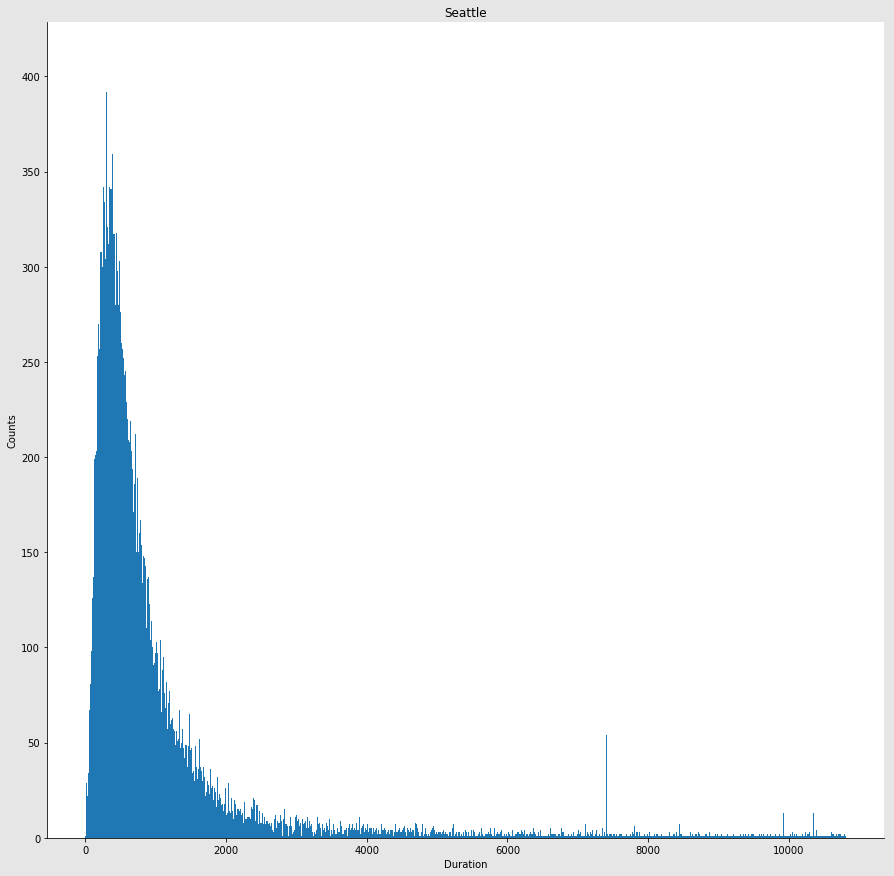

In [19]:
fig, ax = plt.subplots(figsize = [15,15], facecolor = [0.9,0.9,0.9])
labels, values = zip(*counter_se.items())
#plt.hist(c,facecolor='g')
indexes = np.arange(len(labels))
plt.bar(indexes, values, 1)
plt.xlabel('Duration')
plt.ylabel('Counts')
plt.title('Seattle')
#plt.axis([0, 10000, 0, 1000000])
#plt.grid(True)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.show()

In [20]:
np.mean(c_se), np.median(c_se)

(1177.7961214124111, 624.0)

In [21]:
c_se = list(filter(lambda x: x < 3000, c_se))

In [22]:
counter_se = Counter(c_se)

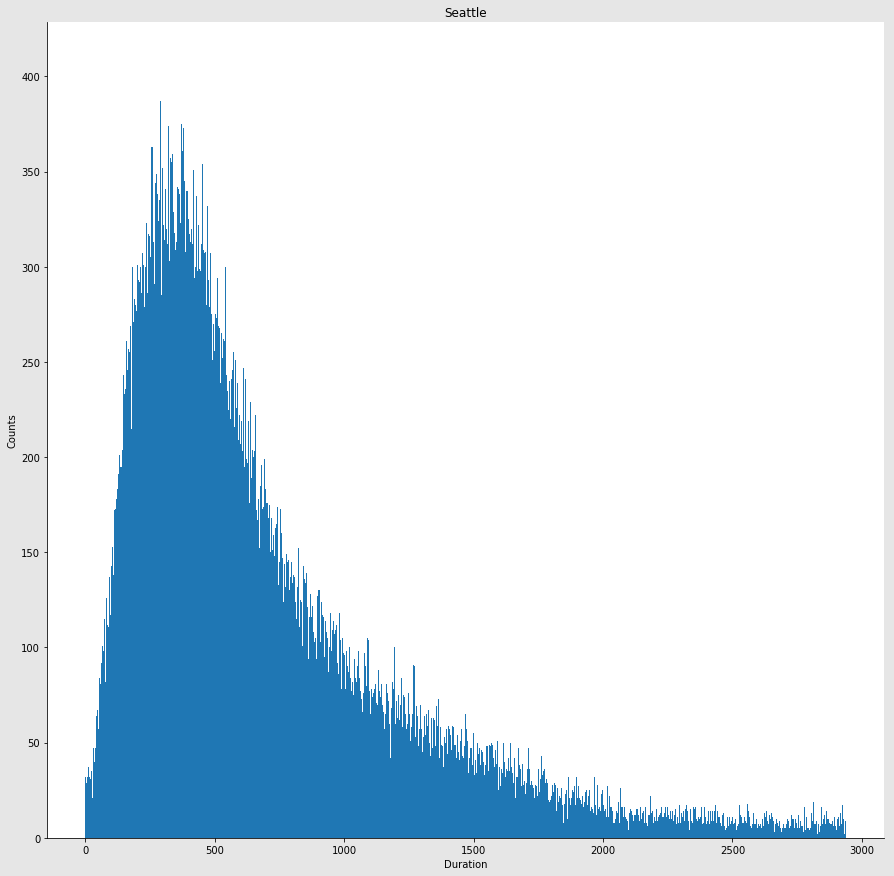

In [23]:
fig, ax = plt.subplots(figsize = [15,15], facecolor = [0.9,0.9,0.9])
labels, values = zip(*counter_se.items())
#plt.hist(c,facecolor='g')
indexes = np.arange(len(labels))
plt.bar(indexes, values, 1)
plt.xlabel('Duration')
plt.ylabel('Counts')
plt.title('Seattle')
#plt.axis([0, 10000, 0, 1000000])
#plt.grid(True)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.show()

In [24]:
np.mean(c_se), np.std(c_se)

(751.92733933008049, 538.01172295822676)

In [25]:
c_all = trip_se.duration.tolist() + trip_bay.duration.tolist()

In [26]:
c_all = Counter(c_all)
#c_all

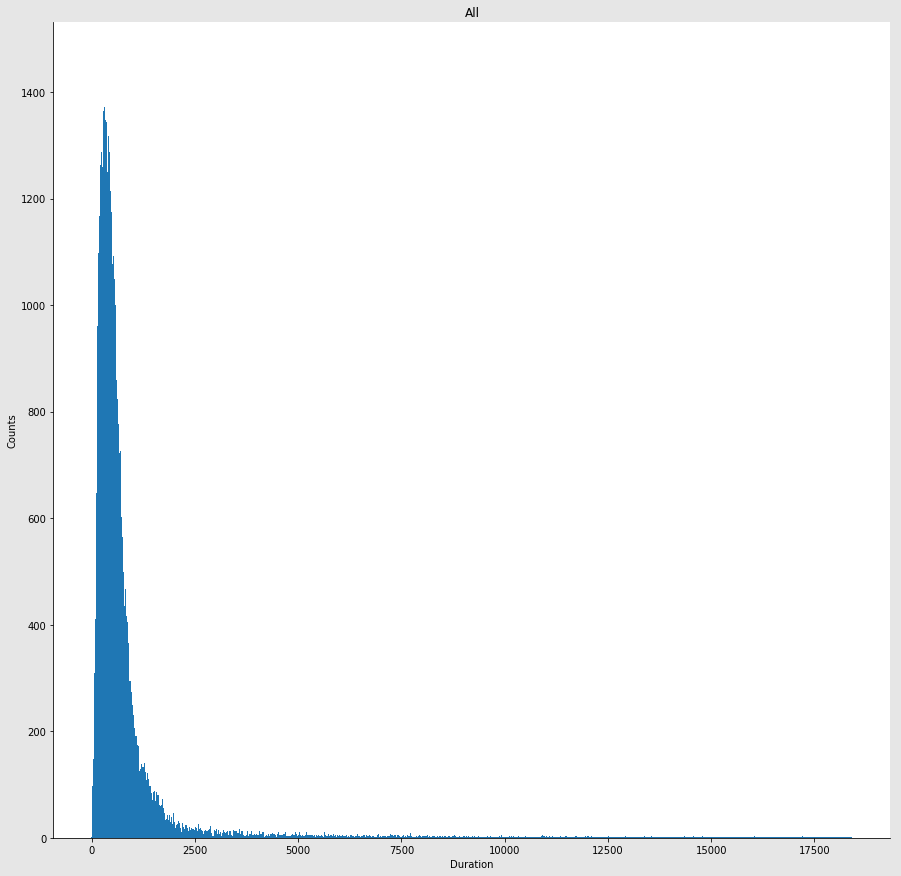

In [27]:
fig, ax = plt.subplots(figsize = [15,15], facecolor = [0.9,0.9,0.9])
labels, values = zip(*c_all.items())
#plt.hist(c,facecolor='g')
indexes = np.arange(len(labels))
plt.bar(indexes, values, 1)
plt.xlabel('Duration')
plt.ylabel('Counts')
plt.title('All')
#plt.axis([0, 10000, 0, 1000000])
#plt.grid(True)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.show()

### Weather Bay

In [80]:
weather_sf = pd.read_csv('weather_sf_old.csv')

In [81]:
weather_sf.head()

,Year,Month,Day,Hour,Minute,Temperature [2 m above gnd],Relative humidity [2 m above gnd],Total Precipitation [sfc],Snowfall amount raw [sfc],Shortwave Radiation - backwards [sfc],Wind speed [10 m above gnd],Wind direction [10 m above gnd]
0,2014,11,1,0,0,55.29,70,0.0,0.0,0.0,4.61,129.09
1,2014,11,1,1,0,54.25,75,0.0,0.0,0.0,4.84,123.69
2,2014,11,1,2,0,53.96,75,0.0,0.0,0.0,4.16,126.25
3,2014,11,1,3,0,52.61,73,0.0,0.0,0.0,2.85,135.00
4,2014,11,1,4,0,53.24,63,0.0,0.0,0.0,2.12,161.57


In [204]:
#station_city = pd.read_csv('station.csv')
#trip_bay = pd.read_csv('trip.csv')

In [87]:
trip_sj = trip_bay[trip_bay.city == 'San Jose']

In [88]:
trip_sj.shape

(37878, 13)

In [213]:
'''#city_list = []
#for i in trip_bay.start_station_id.values:
 #   city_list.append(station_city.loc[station_city.id == i, 'city'].values[0])

#l = pd.DataFrame(city_list, columns =['city'])

new_trip = pd.concat([trip_bay, l], 1)

new_trip.loc[:,'start_date'] =pd.to_datetime(new_trip['start_date'].values)
new_trip.loc[:,'end_date'] =pd.to_datetime(new_trip['end_date'].values)

new_trip.to_csv('sf_trip_city.csv')'''

In [58]:
trip_sj.head(1)

,Unnamed: 0,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,city
1,1,4607,70,2013-08-29 14:42:00,San Jose City Hall,10,2013-08-29 14:43:00,San Jose City Hall,10,661,Subscriber,95138,San Jose


In [76]:
def addspliteddate(dataset):
    data_split = {}
    data_split['startyear'] = []
    data_split['startmonth'] = []
    data_split['startday'] = []
    data_split['starthour'] = []
    #data_split['startmin'] = []
    data_split['endyear'] = []
    data_split['endmonth'] = []
    data_split['endday'] = []
    data_split['endhour'] = []
    #data_split['endmin'] = []
    for i in range(len(dataset)):
        #print(pd.to_datetime(dataset.iloc[i].start_date).year)
        data_split['startyear'].append(pd.to_datetime(dataset.iloc[i].start_date).year)
        data_split['startmonth'].append(pd.to_datetime(dataset.iloc[i].start_date).month)
        data_split['startday'].append(pd.to_datetime(dataset.iloc[i].start_date).day)
        data_split['starthour'].append(pd.to_datetime(dataset.iloc[i].start_date).hour)
        #data_split['startmin'].append(pd.to_datetime(dataset.iloc[i].start_date).minute)
        data_split['endyear'].append(pd.to_datetime(dataset.iloc[i].end_date).year)
        data_split['endmonth'].append(pd.to_datetime(dataset.iloc[i].end_date).month)
        data_split['endday'].append(pd.to_datetime(dataset.iloc[i].end_date).day)
        data_split['endhour'].append(pd.to_datetime(dataset.iloc[i].end_date).hour)
        #data_split['endmin'].append(pd.to_datetime(dataset.iloc[i].end_date).minute)
    date_pd = pd.DataFrame(data_split)
    date_pd = date_pd[['startyear', 'startmonth', 'startday', 'starthour',
                      'endyear', 'endmonth', 'endday', 'endhour']]
    return date_pd

In [123]:
t = trip_sj.iloc[22000:22005]

In [124]:
date_pd = addspliteddate(t.head())
date_pd.head()

,startyear,startmonth,startday,starthour,endyear,endmonth,endday,endhour
0,2015,7,22,15,2015,7,22,15
1,2015,7,22,15,2015,7,22,15
2,2015,7,22,15,2015,7,22,15
3,2015,7,22,14,2015,7,22,14
4,2015,7,22,13,2015,7,22,13


In [107]:
date_pd.shape

(5, 8)

In [125]:
#temp = trip_sj.head()
temp = t.reset_index(drop=True)
temp

,Unnamed: 0,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,city
0,358454,857470,406,2015-07-22 15:37:00,San Jose Civic Center,3,2015-07-22 15:44:00,San Jose Diridon Caltrain Station,2,293,Subscriber,94070,San Jose
1,358468,857447,704,2015-07-22 15:20:00,Japantown,9,2015-07-22 15:31:00,MLK Library,11,670,Subscriber,95112,San Jose
2,358473,857441,476,2015-07-22 15:16:00,Arena Green / SAP Center,14,2015-07-22 15:24:00,Paseo de San Antonio,7,247,Subscriber,95113,San Jose
3,358499,857406,219,2015-07-22 14:28:00,San Jose Diridon Caltrain Station,2,2015-07-22 14:32:00,Santa Clara at Almaden,4,701,Subscriber,95126,San Jose
4,358544,857358,534,2015-07-22 13:14:00,Japantown,9,2015-07-22 13:23:00,San Pedro Square,6,690,Subscriber,95112,San Jose


In [126]:
temp_sj = pd.concat([temp,date_pd], axis=1)

In [127]:
temp_sj

,Unnamed: 0,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,...,zip_code,city,startyear,startmonth,startday,starthour,endyear,endmonth,endday,endhour
0,358454,857470,406,2015-07-22 15:37:00,San Jose Civic Center,3,2015-07-22 15:44:00,San Jose Diridon Caltrain Station,2,293,...,94070,San Jose,2015,7,22,15,2015,7,22,15
1,358468,857447,704,2015-07-22 15:20:00,Japantown,9,2015-07-22 15:31:00,MLK Library,11,670,...,95112,San Jose,2015,7,22,15,2015,7,22,15
2,358473,857441,476,2015-07-22 15:16:00,Arena Green / SAP Center,14,2015-07-22 15:24:00,Paseo de San Antonio,7,247,...,95113,San Jose,2015,7,22,15,2015,7,22,15
3,358499,857406,219,2015-07-22 14:28:00,San Jose Diridon Caltrain Station,2,2015-07-22 14:32:00,Santa Clara at Almaden,4,701,...,95126,San Jose,2015,7,22,14,2015,7,22,14
4,358544,857358,534,2015-07-22 13:14:00,Japantown,9,2015-07-22 13:23:00,San Pedro Square,6,690,...,95112,San Jose,2015,7,22,13,2015,7,22,13


In [136]:
((pd.to_datetime(temp.iloc[3].start_date)-pd.to_datetime(temp.iloc[1].end_date))/np.timedelta64(1, 'h')).astype(int)

-1

In [133]:
pd.to_datetime(temp.iloc[3].start_date)

Timestamp('2015-07-22 14:28:00')

In [135]:
pd.to_datetime(temp.iloc[1].end_date)

Timestamp('2015-07-22 15:31:00')

In [72]:
id_set = set(trip.bike_id.tolist())

### Lifecycle

In [19]:
def tempcovert(temp):
    # convert the bike_id according to the lifecycle, e.g., 19 -> 19_1, 19_2, 19_3
    # condition: interval > 7days and start_station != last end_station
    # final_id: the last seen id, e.g., 19_3, since it is possible the life_cycle of this id does not end
    final_id_list = []
    counts = 0
    for i in range(len(temp)):
        old_id = temp.iloc[i].bike_id
        if i == 0:
            temp.iloc[i, 8] = str(old_id) +'_'+str(counts)
            #print(i, temp.iloc[i].bike_id)
        elif i == len(temp)-1:
            temp.iloc[i, 8] = str(old_id) +'_'+str(counts) 
            final_id = str(old_id) +'_'+str(counts) 
            #temp = temp[temp.bike_id != final_id]
            final_id_list.append(final_id)
            print(final_id)
        else:
            if (((temp.iloc[i].start_date-temp.iloc[i-1].end_date)/ np.timedelta64(1, 'D')).astype(int) > 7 and
               temp.iloc[i].start_station_id != temp.iloc[i-1].end_station_id):
                counts += 1
            temp.iloc[i, 8] = str(old_id) +'_'+str(counts) 
            #print(i, temp.iloc[i].bike_id)
    return temp, final_id


In [10]:
trimmed_dataset = pd.read_csv("trim_bay_2min_6hours.csv")
#id_set = [9,10]

In [15]:
trimmed_dataset.loc[:,'start_date'] =pd.to_datetime(trimmed_dataset['start_date'].values)
trimmed_dataset.loc[:,'end_date'] =pd.to_datetime(trimmed_dataset['end_date'].values)

In [16]:
id_set = set(trimmed_dataset.bike_id.unique())

In [20]:
coverted_pd = pd.DataFrame()
finalid_list = []
for bikeid in id_set:
    temp = trimmed_dataset[trimmed_dataset['bike_id'] == bikeid]
    temp.sort_values(by=['start_date'])
    temp['start_date'] =pd.to_datetime(temp['start_date'].values)
    temp['end_date'] =pd.to_datetime(temp['end_date'].values)
    temp, final_id = tempcovert(temp)
    coverted_pd = pd.concat([coverted_pd, temp])
    finalid_list.append(final_id)

C:\Users\Xuancheng Fan\AppData\Local\Programs\Python\Python35\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Xuancheng Fan\AppData\Local\Programs\Python\Python35\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Xuancheng Fan\AppData\Local\Programs\Python\Python35\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

9_3
10_7
11_10
12_6
13_5
14_4
15_4
16_3
17_4
18_5
19_5
20_7
21_5
22_6
23_2
24_5
25_6
26_5
27_7
28_3
29_5
30_7
31_5
32_4
33_1
34_3
35_4
36_5
37_6
38_6
39_5
40_8
41_8
42_4
43_6
44_5
45_5
46_7
47_7
48_5
49_9
50_5
51_7
52_7
53_4
54_6
55_6
56_10
57_4
58_7
59_5
60_4
61_7
62_3
63_9
64_6
65_6
66_4
67_4
68_6
69_7
70_3
71_4
72_5
74_7
75_4
76_3
77_7
78_6
79_4
80_4
81_8
82_8
83_5
84_6
85_4
86_3
87_5
88_5
89_3
90_4
91_5
92_4
93_7
94_4
95_5
96_6
97_5
98_3
99_5
100_7
101_4
102_3
103_4
104_5
105_3
106_4
107_6
108_8
109_4
110_2
111_4
112_5
116_4
117_6
118_5
119_6
120_6
121_6
122_4
123_5
124_7
125_5
126_3
127_4
128_6
129_6
130_5
131_5
132_5
133_5
134_5
135_4
136_5
137_3
138_8
139_8
140_7
141_5
142_8
143_7
144_6
145_5
146_6
147_6
148_7
149_7
150_5
151_6
152_3
153_7
154_5
155_5
156_6
157_5
158_4
159_5
160_7
161_7
162_5
163_6
164_8
165_5
167_4
168_6
174_5
175_7
176_6
177_7
178_6
179_6
180_7
181_6
182_3
183_3
184_3
185_6
186_7
187_6
188_5
189_1
190_5
191_4
192_5
193_5
194_6
195_4
196_3
197_5
198_4
199_4
200

In [34]:
coverted_pd.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,city
207,4298,460,2013-08-29 12:02:00,Cowper at University,37,2013-08-29 12:10:00,9_0,35,9,Subscriber,94025,Palo Alto
1354,6340,2746,2013-08-30 18:48:00,University and Emerson,35,2013-08-30 19:34:00,9_0,35,9,Customer,94301,Palo Alto
1717,7123,996,2013-08-31 15:39:00,University and Emerson,35,2013-08-31 15:56:00,9_0,36,9,Customer,10003,Palo Alto
1837,7384,1398,2013-08-31 19:02:00,California Ave Caltrain Station,36,2013-08-31 19:26:00,9_0,35,9,Customer,10036,Palo Alto
1995,6701,9826,2013-08-31 11:45:00,University and Emerson,35,2013-08-31 14:29:00,9_0,35,9,Customer,NaN,Palo Alto


In [26]:
coverted_pd.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,city
207,4298,460,2013-08-29 12:02:00,Cowper at University,37,2013-08-29 12:10:00,9_0,35,9,Subscriber,94025,Palo Alto
1354,6340,2746,2013-08-30 18:48:00,University and Emerson,35,2013-08-30 19:34:00,9_0,35,9,Customer,94301,Palo Alto
1717,7123,996,2013-08-31 15:39:00,University and Emerson,35,2013-08-31 15:56:00,9_0,36,9,Customer,10003,Palo Alto
1837,7384,1398,2013-08-31 19:02:00,California Ave Caltrain Station,36,2013-08-31 19:26:00,9_0,35,9,Customer,10036,Palo Alto
1995,6701,9826,2013-08-31 11:45:00,University and Emerson,35,2013-08-31 14:29:00,9_0,35,9,Customer,NaN,Palo Alto


In [23]:
trimmed_dataset.shape

(661556, 14)

In [25]:
coverted_pd = coverted_pd.drop('Unnamed: 0.1', 1)

In [49]:
coverted_pd.to_csv('life_cycle_trimmed.csv')

In [28]:
with open('final_id_trimmed.list', 'wb') as fout:
    pickle.dump(finalid_list, fout)

In [29]:
coverted_pd.shape

(661556, 12)

In [47]:
coverted_pd.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,city
207,4298,460,2013-08-29 12:02:00,Cowper at University,37,2013-08-29 12:10:00,9_0,35,9,Subscriber,94025,Palo Alto
1354,6340,2746,2013-08-30 18:48:00,University and Emerson,35,2013-08-30 19:34:00,9_0,35,9,Customer,94301,Palo Alto
1717,7123,996,2013-08-31 15:39:00,University and Emerson,35,2013-08-31 15:56:00,9_0,36,9,Customer,10003,Palo Alto
1837,7384,1398,2013-08-31 19:02:00,California Ave Caltrain Station,36,2013-08-31 19:26:00,9_0,35,9,Customer,10036,Palo Alto
1995,6701,9826,2013-08-31 11:45:00,University and Emerson,35,2013-08-31 14:29:00,9_0,35,9,Customer,NaN,Palo Alto


In [42]:
life_bike = coverted_pd.copy()

In [43]:
life_bike['bike_id'] = life_bike['end_station_name']

In [44]:
life_bike.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,city
207,4298,460,2013-08-29 12:02:00,Cowper at University,37,2013-08-29 12:10:00,9_0,35,9_0,Subscriber,94025,Palo Alto
1354,6340,2746,2013-08-30 18:48:00,University and Emerson,35,2013-08-30 19:34:00,9_0,35,9_0,Customer,94301,Palo Alto
1717,7123,996,2013-08-31 15:39:00,University and Emerson,35,2013-08-31 15:56:00,9_0,36,9_0,Customer,10003,Palo Alto
1837,7384,1398,2013-08-31 19:02:00,California Ave Caltrain Station,36,2013-08-31 19:26:00,9_0,35,9_0,Customer,10036,Palo Alto
1995,6701,9826,2013-08-31 11:45:00,University and Emerson,35,2013-08-31 14:29:00,9_0,35,9_0,Customer,NaN,Palo Alto


In [45]:
life_bike = life_bike.groupby('bike_id').sum()

In [53]:
t = life_bike[['duration']]

In [58]:
t['bike_id'] = t.index

C:\Users\Xuancheng Fan\AppData\Local\Programs\Python\Python35\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [60]:
t = t.reset_index(drop=True)

In [62]:
t.to_csv('life_groupby.csv')

In [54]:
t['duration']['sum']

bike_id
100_0     81303
100_1     35732
100_2    109606
100_3       683
100_4      2665
100_5     12348
100_6    330053
101_0     14458
101_1     30148
101_2      5028
101_3     65944
102_0     20244
102_1     25782
102_2    111882
103_0     73637
103_1     29111
103_2     32215
103_3      2699
104_0       462
104_1        92
104_2     15229
104_3       357
104_4     66417
104_5    144016
105_0    289520
105_1      6932
105_2     18672
10_0       6982
10_1       5380
10_2     110494
          ...  
94_1      19779
94_2        558
94_3      99370
95_0      20580
95_1        656
95_2      79571
95_3       2360
95_4     335306
96_0      22166
96_1       9635
96_2       5993
96_3       2100
96_4      18362
96_5     124040
97_0       3293
97_1      28935
97_2       3459
97_3       8121
97_4     175050
98_0      25821
98_1     124265
98_2     120844
99_0     283664
99_1       3808
99_2       7286
99_3       6868
99_4      66075
9_0      118941
9_1         616
9_2      102340
Name: sum, Lengt

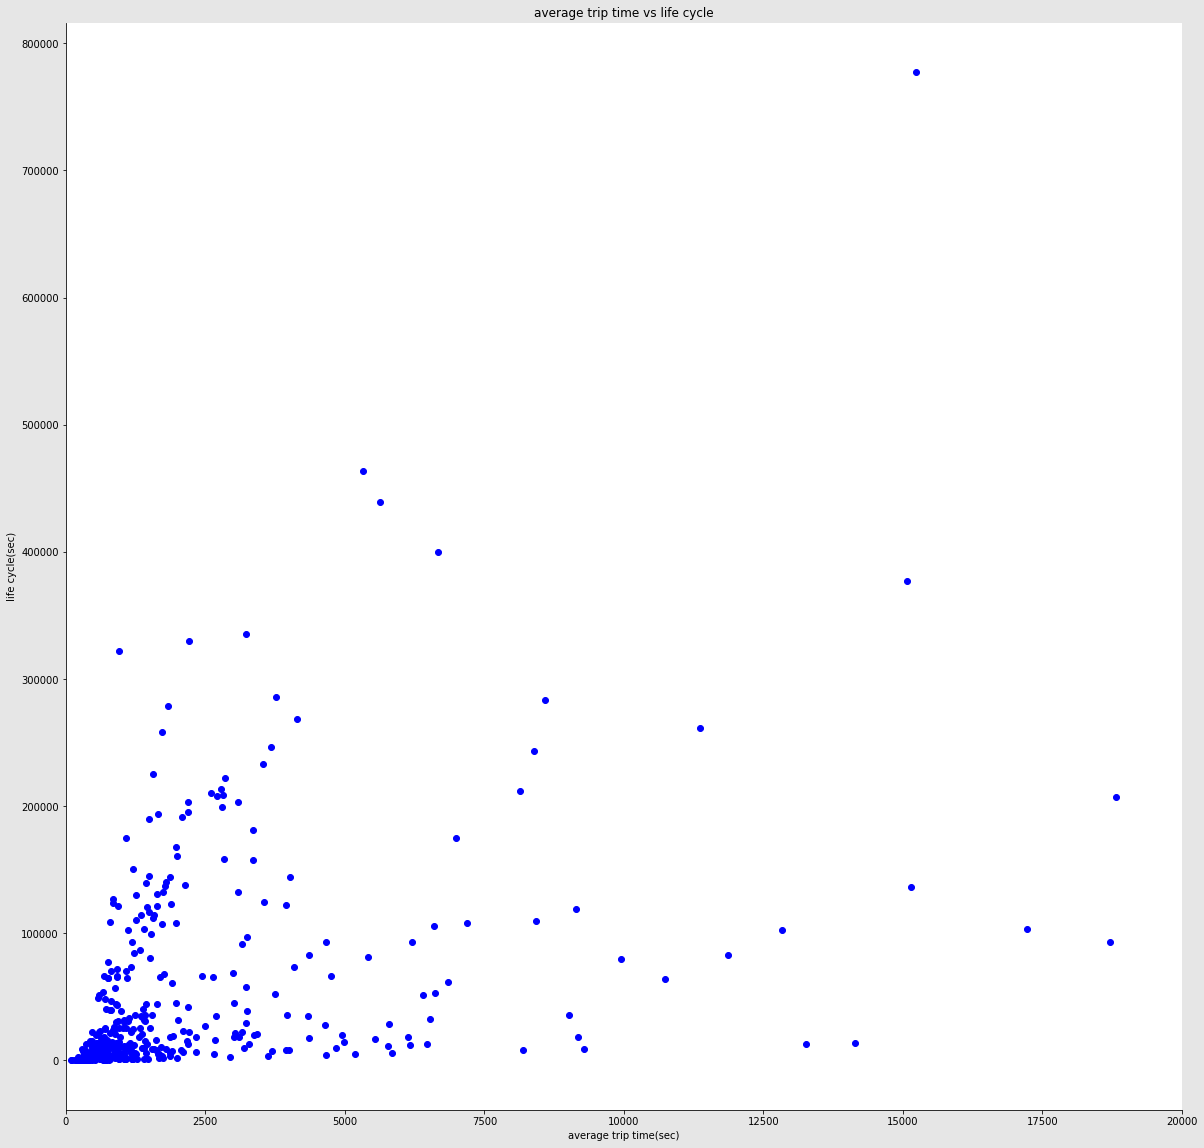

In [59]:
# Your code here
fig, ax = plt.subplots(figsize = [20,20], facecolor=[0.9,0.9,0.9])

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
#ax.spines['bottom'].set_position(('data',0)) # set position of x spine to x=0

ax.yaxis.set_ticks_position('left')
#ax.spines['left'].set_position(('data',0))   # set position of y spine to y=0

x_axis1=t['duration']['mean']
y_axis1=t['duration']['sum']

ax.scatter(x_axis1, y_axis1, c='b', marker="o")
ax.set_xlim([0,20000])
#ax.set_xticks(range(len(feature_list)))

#ax.set_xticklabels(feature_list,fontsize=12)


plt.xlabel('average trip time(sec)')
plt.ylabel('life cycle(sec)')
plt.title('average trip time vs life cycle')


plt.show()

In [63]:
with open('final_id_trimmed.list', 'rb') as fin:
    final_list = pickle.load(fin)

In [65]:
len(final_list)

700

In [66]:
life_cycle_trimmed = pd.read_csv('life_cycle_trimmed.csv')

In [68]:
life_cycle_trimmed['bike_id'] = life_cycle_trimmed['end_station_name'] 

In [72]:
len(life_cycle_trimmed.bike_id.unique())

3273

In [75]:
temp = life_cycle_trimmed[~life_cycle_trimmed['bike_id'].isin(final_list)]

In [77]:
temp.shape

(301980, 13)

In [80]:
temp.to_csv('life_cycle_remove_lastid.csv')